# Testing the model

Using your solution so far, test the model on new data.

The new data is located in the ‘Bank_data_testing.csv’.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [2]:
raw_data = pd.read_csv('Bank-data.csv')
raw_data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0,1,0,0,117,no
1,1,0.767,0,0,2,1,274,yes
2,2,4.858,0,1,0,0,167,no
3,3,4.120,0,0,0,0,686,yes
4,4,4.856,0,1,0,0,157,no
...,...,...,...,...,...,...,...,...
513,513,1.334,0,1,0,0,204,no
514,514,0.861,0,0,2,1,806,yes
515,515,0.879,0,0,0,0,290,no
516,516,0.877,0,0,5,1,473,yes


Note that <i> interest rate</i> indicates the 3-month interest rate between banks and <i> duration </i> indicates the time since the last contact was made with a given consumer. The <i> previous </i> variable shows whether the last marketing campaign was successful with this customer. The <i>march</i> and <i> may </i> are Boolean variables that account for when the call was made to the specific customer and <i> credit </i> shows if the customer has enough credit to avoid defaulting.

We want to know whether the bank marketing strategy was successful, so we need to transform the outcome variable into Boolean values in order to run regressions.

In [3]:
data = raw_data.copy()
data = data.drop(['Unnamed: 0'], axis = 1)
data['y'] = data['y'].map({'yes':1, 'no':0})
data

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0,1,0,0,117,0
1,0.767,0,0,2,1,274,1
2,4.858,0,1,0,0,167,0
3,4.120,0,0,0,0,686,1
4,4.856,0,1,0,0,157,0
...,...,...,...,...,...,...,...
513,1.334,0,1,0,0,204,0
514,0.861,0,0,2,1,806,1
515,0.879,0,0,0,0,290,0
516,0.877,0,0,5,1,473,1


In [4]:
data.describe()

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [5]:
y = data['y']
x1 = data['duration']

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [6]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 Jun 2020   Pseudo R-squ.:                  0.2121
Time:                        16:28:36   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

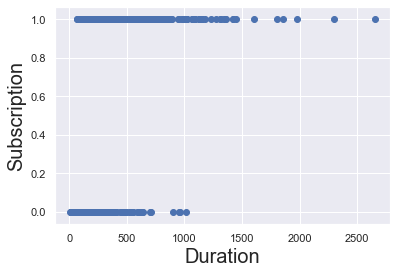

In [7]:
plt.scatter(x1,y,color = 'C0')
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [8]:
estimators=['interest_rate','credit','march','previous','duration']

X1_all = data[estimators]
y = data['y']

In [9]:
X_all = sm.add_constant(X1_all)
reg_logit = sm.Logit(y,X_all)
results_logit = reg_logit.fit()
results_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.514     
Dependent Variable: y                AIC:              360.7836  
Date:               2020-06-18 16:28 BIC:              386.2834  
No. Observations:   518              Log-Likelihood:   -174.39   
Df Model:           5                LL-Null:          -359.05   
Df Residuals:       512              LLR p-value:      1.2114e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.0211   0.3113 -0.0677 0.9460 -0.6313  0.5891
interest_rate     -0.8001   0.0895 -8.9434 0.0000 -0.9755 -0.6248
credit             2.3585   1.0875  2.1688 0.0301  0.2271  4.4900
march             -1.8322   0.3297 -5.5563 0.0000 -2.4785 -1.1859
previous           1.5363   0.5010  3.0666 0.0022  0.5544  2.5182
duration           0.0070   0.0007  9.3810 0.0000  0.0055  0.0084
=================================================================

"""

### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

In [10]:
def confusion_matrix(data,actual_values,model):
        
        pred_values = model.predict(data)
        bins=np.array([0,0.5,1])
        # Creating a histogram, where if values are between 0 and 0.5, they will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()

        return cm, accuracy

In [11]:
confusion_matrix(X_all,y,results_logit)

(array([[218.,  41.],
        [ 30., 229.]]), 0.862934362934363)

## Test the model

Load the test data from the 'Bank_data_testing.csv' file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

In [13]:
raw_data2 = pd.read_csv('Bank-data-testing.csv')
data_test = raw_data2.copy()
data_test = data_test.drop(['Unnamed: 0'], axis = 1)

In [14]:
data_test['y'] = data_test['y'].map({'yes':1, 'no':0})
data_test

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0
...,...,...,...,...,...,...,...
217,4.963,0.0,0.0,0.0,0.0,458.0,1
218,1.264,0.0,1.0,1.0,0.0,397.0,1
219,1.281,0.0,1.0,0.0,0.0,34.0,0
220,0.739,0.0,0.0,2.0,0.0,233.0,0


### Declare the dependent and the independent variables

In [15]:
y_test = data_test['y']
X1_test = data_test[estimators]
X_test = sm.add_constant(X1_test)

Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [18]:
# test accuracy
confusion_matrix(X_test, y_test, results_logit)

(array([[93., 18.],
        [13., 98.]]), 0.8603603603603603)

In [19]:
# train accuracy
confusion_matrix(X_all,y, results_logit)

(array([[218.,  41.],
        [ 30., 229.]]), 0.862934362934363)

Looking at the test acccuracy we see a number which is a tiny but lower: 86.04%, compared to 86.29% for train accuracy. 

In general, we always expect the test accuracy to be lower than the train one. If the test accuracy is higher, this is just due to luck.

Note that when you run the regression, you may get different numbers than us!